<a href="https://colab.research.google.com/github/jelly-decoder28/poppy-june/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = '/content/mouse-protein-expression (1).csv'

data = pd.read_csv(data_path)

# Split the data into features (protein expressions) and target (classes)

# All protein expressions (original daataset)
X = data.iloc[:, 1:76]

# Top significant protein markers (minimized dataset)
X = data[['GluR3_N', 'pCAMKII_N', 'Tau_N', 'GluR4_N', 'SHH_N', 'SOD1_N', 'BRAF_N', 'P3525_N', 'pP70S6_N', 'pGSK3B_Tyr216_N','APP_N', 'pPKCG_N', 'S6_N', 'AcetylH3K9_N', 'H3AcK18_N', 'pCREB_N']]

# Classes
y = data.iloc[:, 81]

# Split the dataset into 90% training and 10% validation with stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Combine the features and target for training and validation sets
train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)

# Correct the file paths to save the training and validation sets
train_set_path = '/content/training_set.csv'
val_set_path = '/content/validation_set.csv'

# Save the training and validation sets to the correct paths
train_set.to_csv(train_set_path, index=False)
val_set.to_csv(val_set_path, index=False)



In [ ]:
from sklearn.impute import SimpleImputer #impute missing values instead of removing (generally preferred to preserve as much data as possible)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the training and validation sets
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Define the model pipeline with standard scaling and SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))  # <-- hyperparameter tuning here

# Train the model
svm_model.fit(X_train_imputed, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val_imputed)

# Print classification report
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.62      0.87      0.72        15
         2.0       0.93      0.87      0.90        15
         3.0       0.55      0.46      0.50        13
         4.0       0.81      1.00      0.90        13
         5.0       0.70      0.50      0.58        14
         6.0       0.92      0.79      0.85        14
         7.0       0.91      0.91      0.91        11
         8.0       1.00      1.00      1.00        13

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.79       108
weighted avg       0.80      0.80      0.79       108



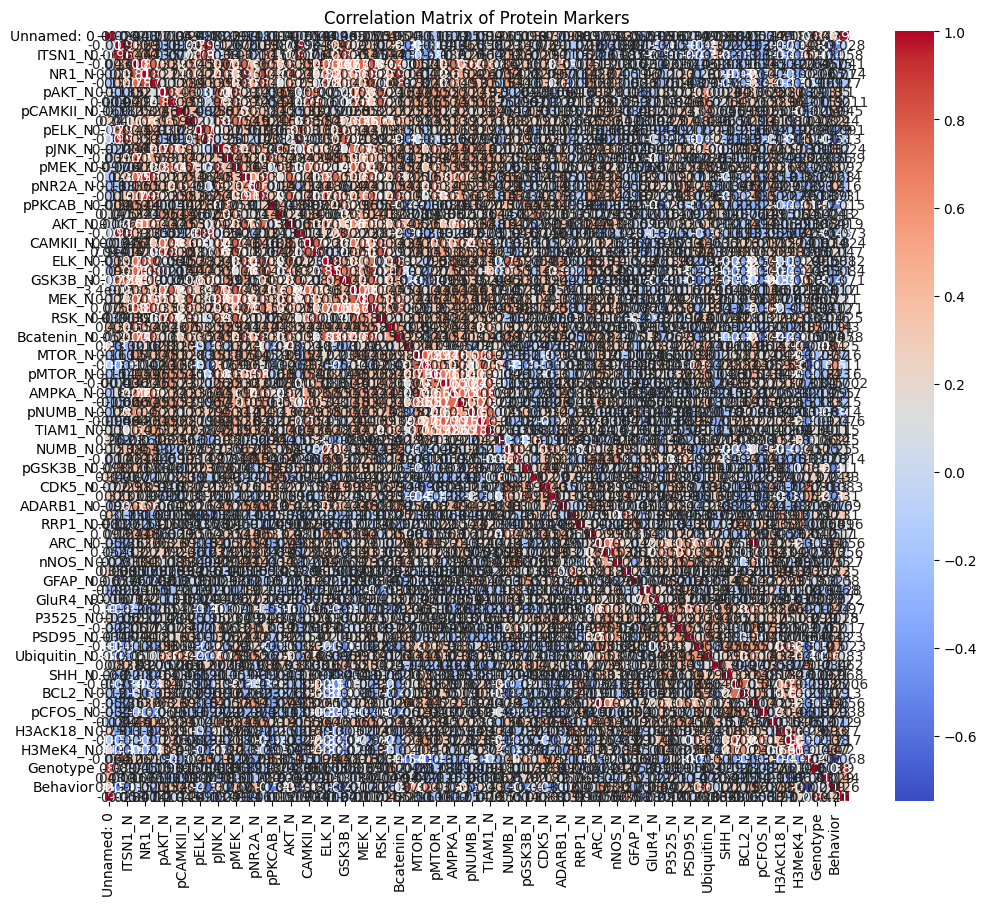

Most important protein markers:
['class', 'Genotype', 'Treatment', 'APP_N', 'Tau_N', 'pPKCG_N', 'S6_N', 'AcetylH3K9_N', 'GluR3_N', 'pP70S6_N', 'Behavior', 'H3AcK18_N', 'pCREB_N']


In [ ]:
#Apply Correlation Analysis for Protein Markers

import numpy as np

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Protein Markers')
plt.show()

# Get the most important protein markers based on absolute correlation with the target variable (first column)
target_column_index = 0 # <- Actual index of target column
target_correlations = correlation_matrix.iloc[target_column_index, 1:]  # Exclude correlation with itself
most_important_markers = target_correlations.abs().sort_values(ascending=False)

print("Most important protein markers:")
print(most_important_markers.head(13).index.tolist())


In [ ]:
#Apply PCA Analayis for Protein Markers

#1: Normalize the data
#2: Apply PCA to protein expression levels
#3: Identify principal components that explain the most variance
#4: Determine most important protein markers based on their loadings in the principal components

from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape) # of columns

# Get the loadings of the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# Determine the most important protein markers based on the absolute loadings
most_important_markers = loadings.abs().sum(axis=1).sort_values(ascending=False)

print("Most important protein markers based on PCA:")
print(most_important_markers.head(10).index.tolist())


(1080, 10)
Most important protein markers based on PCA:
['GluR3_N', 'pCAMKII_N', 'Tau_N', 'GluR4_N', 'SHH_N', 'SOD1_N', 'BRAF_N', 'P3525_N', 'pP70S6_N', 'pGSK3B_Tyr216_N']


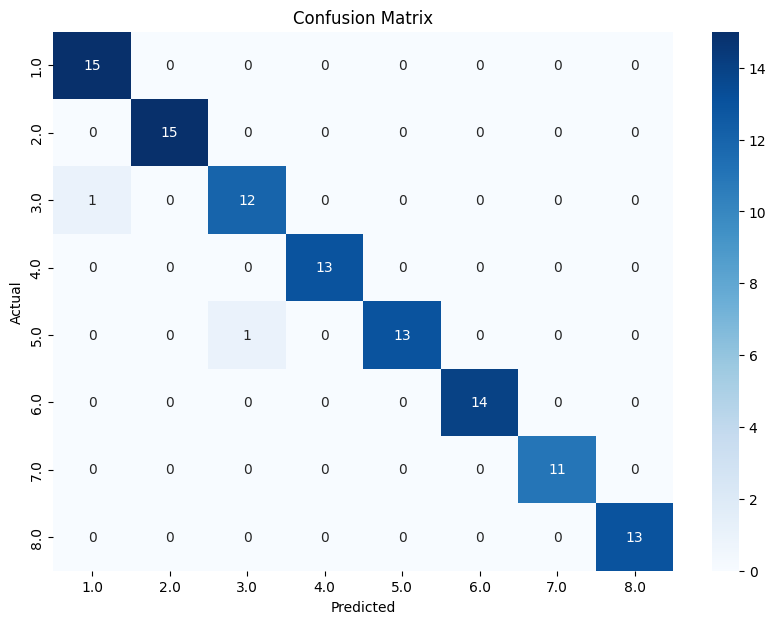

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#-------------------------------------------------------------------------------
#Loss functions graphs will be implemented when we utilize neural networks....
#-------------------------------------------------------------------------------


#import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

# Define the model pipeline with standard scaling and Logistic Regression
#logreg_model = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))

# Train the model
#logreg_model.fit(X_train_imputed, y_train)

# Extract loss values (neg_log_loss) from the logistic regression model
#loss_values = logreg_model.named_steps['logisticregression'].n_iter_

# Plot the loss graph
#plt.figure(figsize=(10, 7))
#plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
#plt.xlabel('Iteration (Epoch)')
#plt.ylabel('Number of iterations (approx. loss)')
#plt.title('Training Loss Graph')
#plt.show()